
# Project: Investigate 'No show Appointments' Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction to the Project</a></li>
    <li><a href="#QuestionsToAnswer">Questions to Answer</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#wrangling">Data Wrangling/cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction To the Project


In this Project, we try extract any useful information about each appointment and visualize our findings in a manner than is easy to follow in order to help us better understand the factors that affect people's show/no-show rate.

The reason for choosing this project is an interest in discovering what other factors contribute to a phenomenon like Not showing up to an appointment someone scheduled for himself.Especially, medical appointments.

<font color = 'green'>Libraries used:</font> <font color ='brown'>Pandas, Numpy, Matplotlib and Seaborn.</font>

<a id ='QuestionsToAnswer'></a>
## Questions To Answer

#### 1.showing visual representations of the categorical data columns <br>
#### 2.which property matters the most when it comes to showing/not-showing up to appoinments ?
####    (Age, Neighbourhood, Scholarship, SMS) <br>
#### 3.which illness matters the most when it comes to showing/non-showing up to appoinments ?
####    (Hypertension, Diabetes, Handicapped, Alcoholism) <br>
#### 4.does the date of 'SheduledDay' or 'AppoinmentDay' have any Effect on show-up rate?
#### 5.does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?



<a id ='Dataset'></a>
## Dataset

we will be investigating the dataset 'noshowappointments-kagglev2-may-2016.csv' from Kaggle. - <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">link</a>

This dataset contains data about each appointment's date(s), and weither or not they recieved SMS.Futhermore, It contians the Patient's Gender, Age and Diagnosis.

<font color = 'brown'>Columns: </font><br>
<ul>
    <li>PatientId<br>
    <li>AppointmentID<br>
    <li>Gender<br>
    <li>ScheduledDay<br>
    <li>AppointmentDay<br>
    <li>Age<br>
    <li>Neighbourhood<br>
    <li>Scholarship<br>
    <li>Hipertension<br>
    <li>Diabetes<br>
    <li>Alcoholism<br>
    <li>Handcap<br>
    <li>SMS_received<br>
    <li>No-show<br>
</ul>

In [1]:
#importing all the libraries used
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as pld
from datetime import datetime
import seaborn as sns

#display plots inline (in the notebook)
%matplotlib inline 

sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) #change default plot size and font scale for a better look

<a id='wrangling'></a>
## Data Wrangling / Cleaning


### reading the data

In [23]:
df = pd.read_csv("datasets/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### General Info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [26]:
df.duplicated().any()

False

<font color = 'blue'>There seems to be no null values and no duplicate rows</font>

### Inspecting the keys:

In [27]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

<font color = 'blue'> 'Hypertension' and 'Handicapped' are miss-spelled

In [28]:
df.rename(columns={"Hipertension":"Hypertension","Handcap":"Handicapped"},inplace=True)

### Inspecting the values:

In [29]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No-show'],
      dtype='object')

In [30]:
df.Gender.unique() #Nothing wrong here, moving on...

array(['F', 'M'], dtype=object)

<font color = 'blue'>'ScheduledDay' and 'AppointmentDay' are datetime, need to be parsed from string.

In [31]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [32]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [33]:
df.Neighbourhood.unique() #Nothing wrong...

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

<font color = 'blue'> avoiding '-' symbol for eaise of operations (ex: df.No_show instead of df['No-show'])

In [34]:
df.rename(columns={'No-show':'No_show'},inplace=True)

### Data Cleaning/Wrangling final note:
Not a lot of changes had to be done to the data, thankfully there were no missing/duplicate values to fix. changed some column names and fixed some miss-spelling.

### after cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicapped     110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Saving Data

In [4]:
df.to_csv("datasets/cleanv1_noshowappointments.csv",index=False) #saving

In [3]:
df = pd.read_csv("datasets/cleanv1_noshowappointments.csv")

#parse datetime
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: 1.showing visual representations of the categorical data columns 

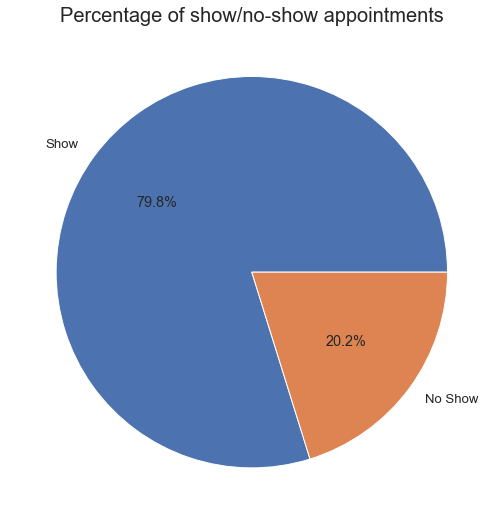

In [5]:
plt.pie(df.No_show.value_counts(),labels=['Show','No Show'],autopct='%.1f%%')
plt.title("Percentage of show/no-show appointments",fontsize=20);

In [40]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

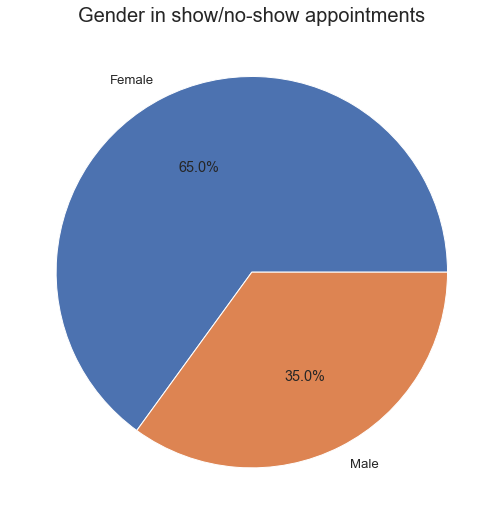

In [41]:
plt.pie(df.Gender.value_counts(),labels=['Female','Male'],autopct='%.1f%%')
plt.title("Gender in show/no-show appointments",fontsize=20);

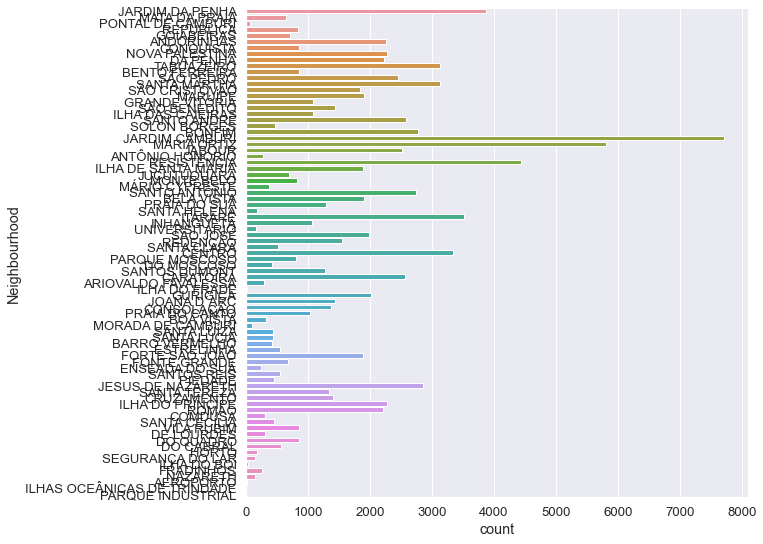

In [42]:
sns.countplot(y='Neighbourhood',data =df);

<font color = 'red'>there are too many Neighbourhoods to just plot normally</font>

In [70]:
df.Neighbourhood.nunique()

81

<font color = 'blue'> There are 81 different Neighbourhoods. so lets plot only the top 10</font>

In [111]:
top_10_Neighbourhood = df.Neighbourhood.value_counts()
top_10_Neighbourhood_labels = list(top_10_Neighbourhood[:10].keys())
top_10_Neighbourhood_labels.append("OTHERS")
top_10_Neighbourhood_values = list(top_10_Neighbourhood[:10].values)
top_10_Neighbourhood_values.append(top_10_Neighbourhood[10:].sum())

In [126]:
print(top_10_Neighbourhood_labels)

['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'ITARARÉ', 'CENTRO', 'TABUAZEIRO', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'BONFIM', 'OTHERS']


In [127]:
print(top_10_Neighbourhood_values)

[7717, 5805, 4431, 3877, 3514, 3334, 3132, 3131, 2853, 2773, 69960]


In [115]:
sum(top_10_Neighbourhood_values)

110527

In [117]:
df.Neighbourhood.count()

110527

Text(0.5, 1.0, 'Top 10 Neighbourhoods')

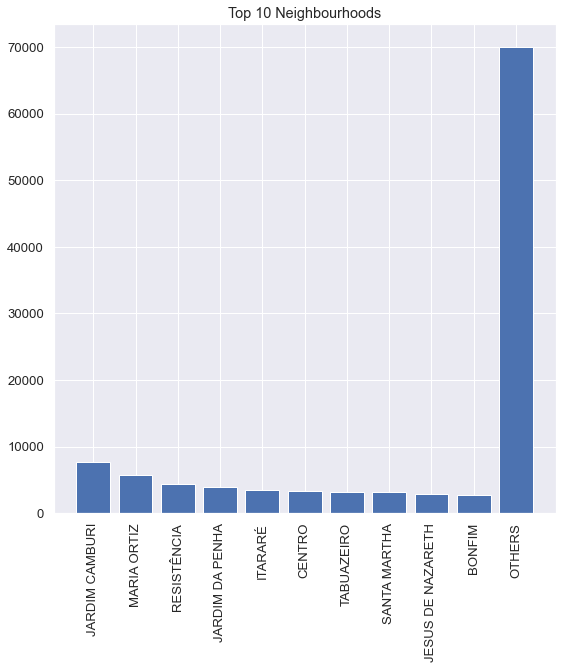

In [128]:
plt.bar(top_10_Neighbourhood_labels,top_10_Neighbourhood_values)
plt.xticks(rotation = 90);
plt.title("Top 10 Neighbourhoods")

In [132]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

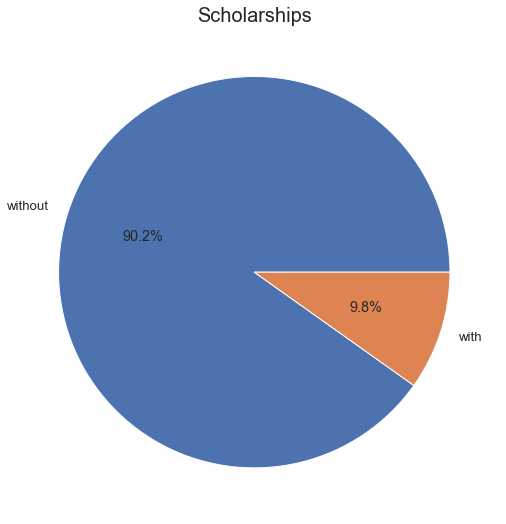

In [134]:
plt.pie(df.Scholarship.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Scholarships",fontsize=20);

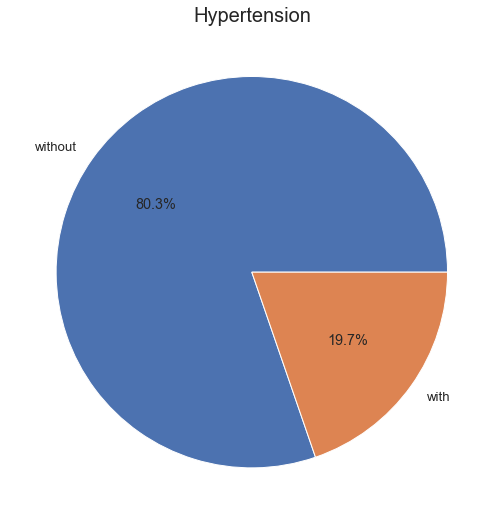

In [136]:
plt.pie(df.Hypertension.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Hypertension",fontsize=20);

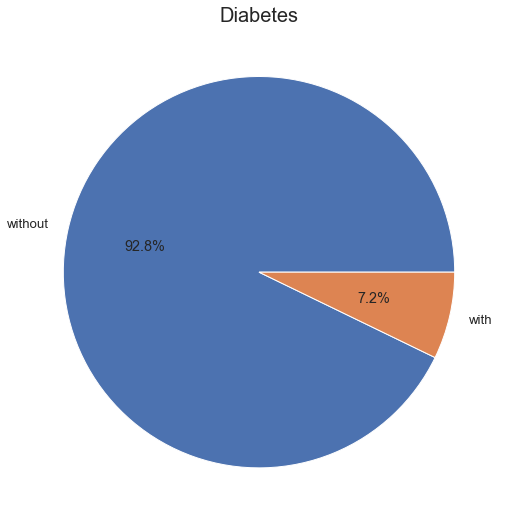

In [137]:
plt.pie(df.Diabetes.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Diabetes",fontsize=20);

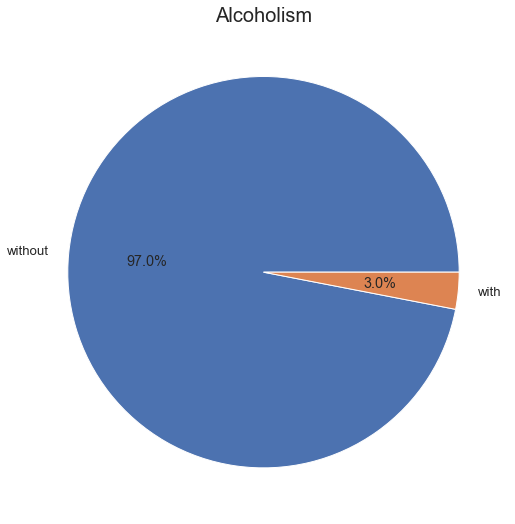

In [138]:
plt.pie(df.Alcoholism.value_counts(),labels=['without','with'],autopct='%.1f%%')
plt.title("Alcoholism",fontsize=20);

In [143]:
handicapped = df.Handicapped.value_counts()
normal = handicapped.values[0]
non_normal = handicapped.values[1:].sum()

In [149]:
[normal,non_normal] #test

[108286, 2241]

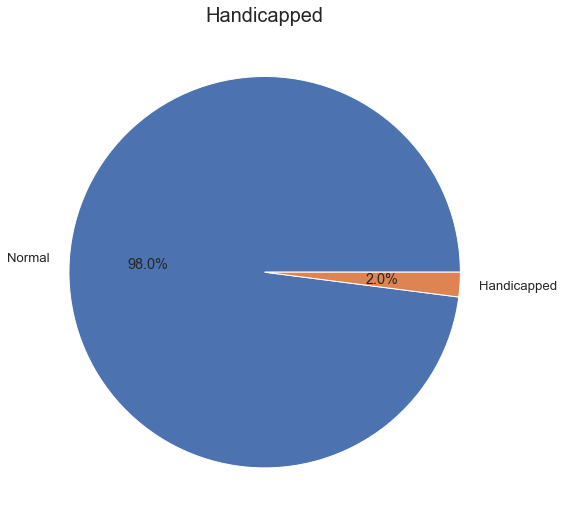

In [144]:
plt.pie([normal,non_normal],labels=['Normal','Handicapped'],autopct='%.1f%%')
plt.title("Handicapped",fontsize=20);

<font color = 'blue'> For the Column 'Handicapped', only 2% of data is handicapped, and they're split up into 4 different levels</font>

In [145]:
handicap_level_lables = ['Level 1','Level 2','Level 3','Level 4']
handicap_level_values = list(handicapped.values[1:])

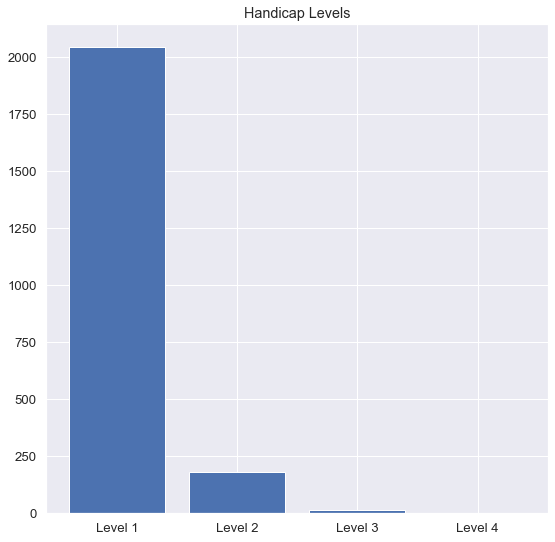

In [153]:
plt.bar(handicap_level_lables,handicap_level_values)
plt.title("Handicap Levels");

<font color = 'blue'> the majority of handicapped patients are of type 'level 1'</font>

In [156]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

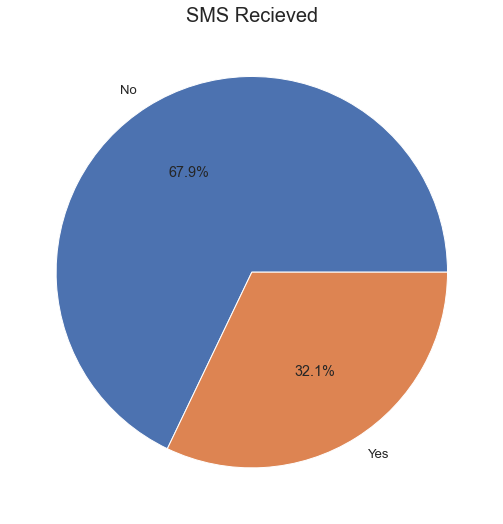

In [155]:
plt.pie(df.SMS_received.value_counts(),labels=['No','Yes'],autopct='%.1f%%')
plt.title("SMS Recieved",fontsize=20);

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>Showing up:	79% Show, 21% No Show
    <li>Gender:	65% Female, 35% Male
    <li>Neighbourhood: 81 different Neighbourhoods, Data almost evenly distributed. Hinting that this Data might be from a large clinc where people come from different Neighbourhoods instead of a local clinic that only has patients from nearby areas
    <li>Scholarships: around 10% have Scholarships
    <li>Hypertension: around 20% have Hypertension
    <li>Diabetesaround 7% are diabetic 
    <li>Alcoholism: 3% of the data
    <li>Handicapped: only 2% of data is handicapped, and they're split up into 4 different levels and the majority of handicapped patients are of type 'level 1'
    <li>SMS: around 32% recieved SMS
</ul>

### Q2: 2.which property matters the most when it comes to showing/not-showing up to appoinments ?

In [158]:
df.keys()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received', 'No_show'],
      dtype='object')

#### Gender

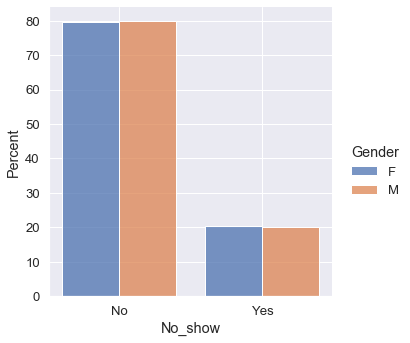

In [10]:
sns.displot(x='No_show',hue ='Gender',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'brown'>Nothing to conclude..</font>

### Age

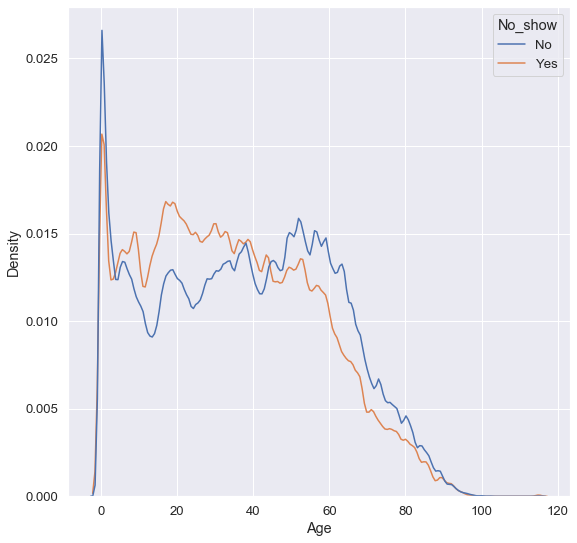

In [5]:
sns.kdeplot(x='Age',hue ='No_show',data=df,bw_adjust=0.25,common_norm = False);

<font color = 'blue'>in the upper section of the 'Age' values (5 to 30), the Patients have a higher probaility to not show up compared to patients that are older (30 to 60).</font> 

<font color = 'green'> A large amount of the data has an empty age column (=0). This points that a lot of patients have undocumented ages, which will hurt the validity of any conclusions we take based on the age of the patients. Recommended that we report back to the client that there is a data gathering problem with 'age' category. However, these columns will not be dropped as the rest of the data in them seems to be of real patients... </font>

### Scholarship

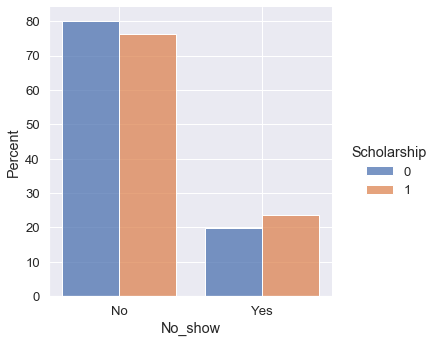

In [7]:
sns.displot(x='No_show',hue ='Scholarship',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'blue'> More patients that show up don't have a Scholarship. And more patients that don't show up are enrolled in a scholarship.</font> 

### SMS

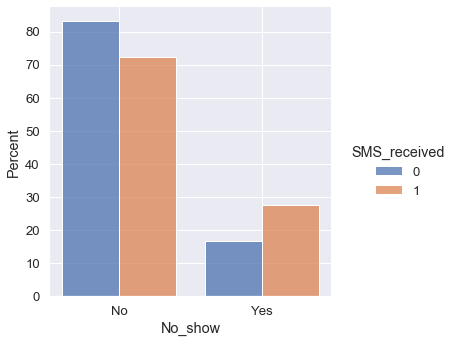

In [13]:
sns.displot(x='No_show',hue ='SMS_received',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'blue'> More patients that show up didn't receive an SMS. And more patients that don't show up received an SMS.</font> 

<font color = 'green'>The number of people that don't show up when they dont recieve an SMS is lower than the people that don't show after getting the SMS. This may suggest that there is a problem with the SMS system that might be affecting the show-up rate negatively. </font> 

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>a lot of patients have undocumented ages (age equals zero). but, in the upper section of the 'Age' values (5 to 30), the Patients have a higher probaility to not show up compared to patients that are older (30 to 60).
    <li>increase in the people with scholarships that don't show up over people that don't showup without a scholarship.
    <li>More patients that show up didn't receive an SMS. And more patients that don't show up received an SMS.
</ul>

a lot of patients have undocumented ages, which will hurt the validity of any conclusions we take based on the age of the patients. Recommended that we report back to the client that there is a data gathering problem with 'age' category. However from the data availibie, the Patients under 30 years old have a higher probaility to not show up compared to patients that are older.

In Addition, There is a slight increase  in people with scholarships that don't show up. Furthermore, The number of people that don't show up when they recieve an SMS is higher than the people that don't show after getting the SMS. This may suggest that there is a problem with the SMS system as it has the reverse effect than intended.

### Q3: which illness matters the most when it comes to showing/non-showing up to appoinments ?

### Hypertension

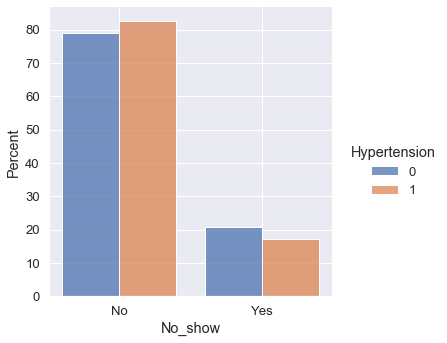

In [14]:
sns.displot(x='No_show',hue ='Hypertension',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'blue'>More people that show up have hypertension.</font>

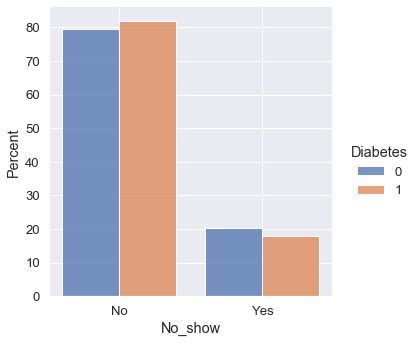

In [15]:
sns.displot(x='No_show',hue ='Diabetes',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'blue'>More people that show up have Diabetes.</font>

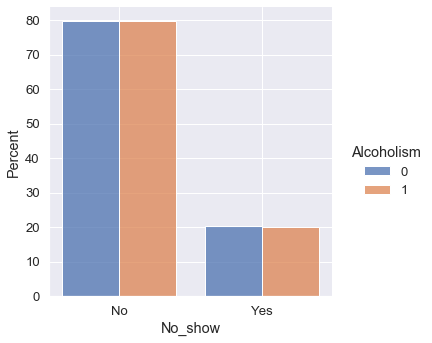

In [18]:
sns.displot(x='No_show',hue ='Alcoholism',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'brown'>Nothing to conclude</font>

In [24]:
hand = df
def handicap_bool(row):
    if row['Handicapped'] == 0:
        return 'No'
    else:
        return 'Yes'
hand['Handicapped2'] = hand.apply(handicap_bool,axis = 1)
hand.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,Handicapped2
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


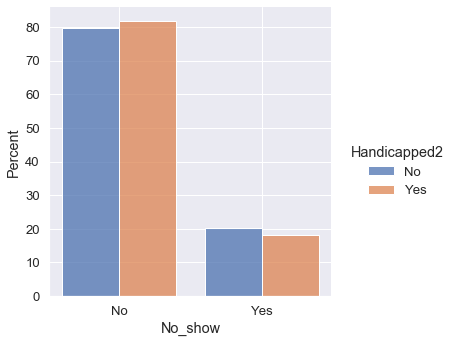

In [25]:
sns.displot(x='No_show',hue ='Handicapped2',data=hand, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'blue'>More patients that show up are handicapped</font>

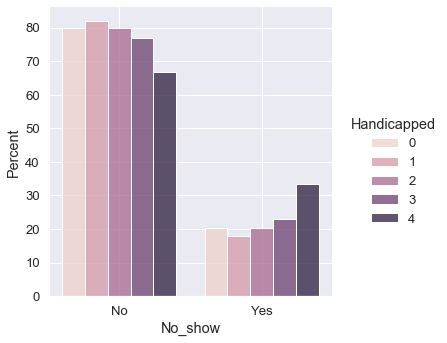

In [19]:
sns.displot(x='No_show',hue ='Handicapped',data=df, kind = 'hist',
            multiple = 'dodge', shrink = 0.8,common_norm = False, stat = 'percent');

<font color = 'green'>People with level 4 handicap are way more likely to not show up</font>

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>higher chance to show-up for Patients that have Hypertension, Diabetes or are Handicapped over all other cateogires.
</ul>

Almost all the graphs showed that Patients with underlying medical conditions have a higher chance of showing up. except Alcoholism, which doesn't have an affect.Furthermore, Handicapped people have a higher chance to show-up except level 4 Handicaps, which have a lower chance to show up.

### Q4: does the date of 'SheduledDay' or 'AppoinmentDay' have any Effect on show-up rate?

In [26]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,Handicapped2
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


In [27]:
df['AppointmentDayName'] = df['AppointmentDay'].dt.day_name()
df['ScheduledDayName'] = df['ScheduledDay'].dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,Handicapped2,AppointmentDayName,ScheduledDayName
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No,Friday,Friday


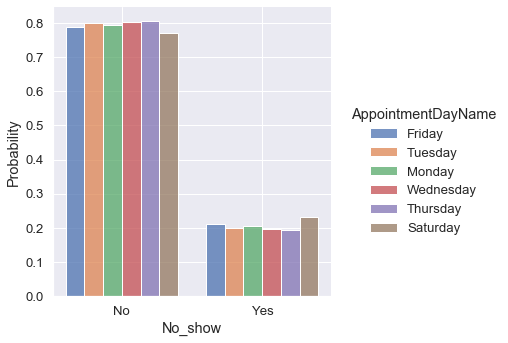

In [28]:
sns.displot(data = df, x = 'No_show', hue = 'AppointmentDayName', common_norm = False, stat = 'probability',
            multiple = 'dodge', shrink = 0.8);

<font color = 'blue'>for appointment days, no show on saturday is higher than the rest of the days</font>

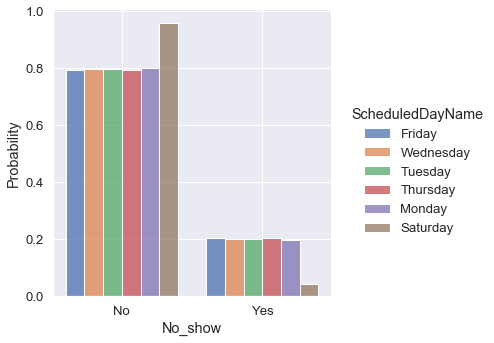

In [12]:
sns.displot(data = df, x = 'No_show', hue = 'ScheduledDayName', common_norm = False, stat = 'probability', multiple = 'dodge', shrink = 0.8);

<font color = 'green'> Patients that schedule on Saturday have a higher chance to show up </font>

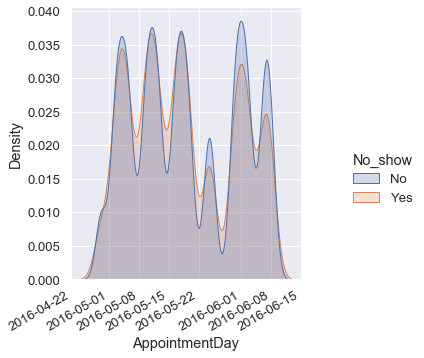

In [10]:
g = sns.displot(data = df, x = 'AppointmentDay', kind = 'kde', hue = 'No_show', common_norm = False, fill = True)
g.figure.autofmt_xdate()

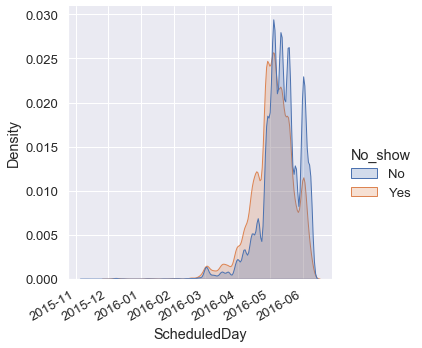

In [13]:
g = sns.displot(data = df, x = 'ScheduledDay', kind = 'kde', hue = 'No_show', common_norm = False, fill = True)
g.figure.autofmt_xdate()

<font color = 'blue'>ScheduleDays usually start 1 month eariler than AppointmentDays (month 3 and 4)</font>

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li> for appointment days, no show on saturday is higher than the rest of the days </li>
    <li> Patients that schedule on Saturday have a higher chance to show up </li>
    <li> ScheduleDays usually start 1 month eariler than AppointmentDays (month 3 and 4) </li>   
    
</ul>

For Saturdays, Both Appointment and Scheduled Days are different than the rest of the week. Patients that schedule on Saturdays have a higher chance of showing up on their appointments. However, Patients with Appointments on saturdays are more likely to not show up.Furthermore, Most 'Scheduled Days' are between March and June and 'Appointment Days' are between April and June. the 1 month difference in distribution may suggest that on average, it takes 1 month to register an appointment. because the whole month of 'March' is already reserved outside the scope of this dataset (eariler).

### Q5: does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?

In [29]:
def difference_in_days(row):
    difference_in_days = row['AppointmentDay'] - row['ScheduledDay']
    difference_in_days = difference_in_days.days
    
    if difference_in_days <= 0:
        return np.nan
    else:
        return difference_in_days
    
df['difference_in_days'] = df.apply(difference_in_days, axis = 1)
df['difference_in_days']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
110522    34.0
110523    34.0
110524    40.0
110525    40.0
110526    40.0
Name: difference_in_days, Length: 110527, dtype: float64

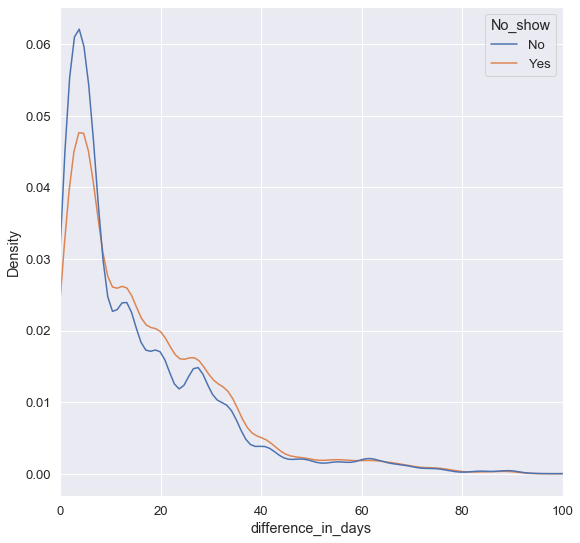

In [32]:
sns.kdeplot(x='difference_in_days',hue='No_show',data=df,common_norm = False)
plt.xlim([0,100]);

<font color = 'green'><h2>Observations:</h2></font>

<font color = 'green'>The shorter the difference in days, the less likely the patients are to not show up. However, the further you go, the more the effect is weaker, to the point it becomes negligable.</font> 

<font color = 'blue'>Example, Someone who has the difference between the 'Appointment Day' and the 'Scheduled Day' less than 10 days. has a higher chance to show up. but, someone who has the difference more than 50+ days has an equal chance to show/not-show. </font>

===================

<a id='conclusions'></a>
## Final Conclusions:

<font color = 'green'><h2>showing visual representations of the categorical data columns :</h2></font>
<ul>
    <li>Showing up:	79% Show, 21% No Show
    <li>Gender:	65% Female, 35% Male
    <li>Neighbourhood: 81 different Neighbourhoods, Data almost evenly distributed. Hinting that this Data might be from a large clinc where people come from different Neighbourhoods instead of a local clinic that only has patients from nearby areas
    <li>Scholarships: around 10% have Scholarships
    <li>Hypertension: around 20% have Hypertension
    <li>Diabetesaround 7% are diabetic 
    <li>Alcoholism: 3% of the data
    <li>Handicapped: only 2% of data is handicapped, and they're split up into 4 different levels and the majority of handicapped patients are of type 'level 1'
    <li>SMS: around 32% recieved SMS
</ul>

<font color = 'green'><h2>which property matters the most when it comes to showing/not-showing up to appoinments ?</h2></font>
<ul>
    <li>a lot of patients have undocumented ages (age equals zero). but, in the upper section of the 'Age' values (5 to 30), the Patients have a higher probaility to not show up compared to patients that are older (30 to 60).
    <li>increase in the people with scholarships that don't show up over people that don't showup without a scholarship.
    <li>More patients that show up didn't receive an SMS. And more patients that don't show up received an SMS.
</ul>

a lot of patients have undocumented ages, which will hurt the validity of any conclusions we take based on the age of the patients. Recommended that we report back to the client that there is a data gathering problem with 'age' category. However from the data availibie, the Patients under 30 years old have a higher probaility to not show up compared to patients that are older.

In Addition, There is a slight increase  in people with scholarships that don't show up. Furthermore, The number of people that don't show up when they recieve an SMS is higher than the people that don't show after getting the SMS. This may suggest that there is a problem with the SMS system as it has the reverse effect than intended.


<font color = 'green'><h2>which illness matters the most when it comes to showing/non-showing up to appoinments ?</h2></font>
<ul>
    <li>higher chance to show-up for Patients that have Hypertension, Diabetes or are Handicapped over all other cateogires.
</ul>

Almost all the graphs showed that Patients with underlying medical conditions have a higher chance of showing up. except Alcoholism, which doesn't have an affect.Furthermore, Handicapped people have a higher chance to show-up except level 4 Handicaps, which have a lower chance to show up.


<font color = 'green'><h2>does the date of 'SheduledDay' or 'AppoinmentDay' have any Effect on show-up rate?</h2></font>
<ul>
    <li> for appointment days, no show on saturday is higher than the rest of the days </li>
    <li> Patients that schedule on Saturday have a higher chance to show up </li>
    <li> ScheduleDays usually start 1 month eariler than AppointmentDays (month 3 and 4) </li>   
    
</ul>

For Saturdays, Both Appointment and Scheduled Days are different than the rest of the week. Patients that schedule on Saturdays have a higher chance of showing up on their appointments. However, Patients with Appointments on saturdays are more likely to not show up.Furthermore, Most 'Scheduled Days' are between March and June and 'Appointment Days' are between April and June. the 1 month difference in distribution may suggest that on average, it takes 1 month to register an appointment. because the whole month of 'March' is already reserved outside the scope of this dataset (eariler).


<font color = 'green'><h2>does the difference between 'ScheduledDay' and 'AppointmentDay' Effect show-up rate ?</h2></font>

<font>The shorter the difference in days, the less likely the patients are to not show up. However, the further you go, the more the effect is weaker, to the point it becomes negligable.</font> 


